## India Air Pollution Analysis 

**First of all this notebook SHAMELESSLY copied from here** [Shubhankar Rawat](https://towardsdatascience.com/india-air-pollution-data-analysis-bd7dbfe93841).

The motive of this notebook is not to replicate this results but find some more insight from it. To increase the feature space for this project I have included some data like Census, Auto registration to see the correlation among them. Please feel free to edit this notebook and create a pull request. We need more brains to solve this complex problem. 

In [1]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
plt.rcParams["figure.figsize"] = [10, 5]

In [119]:
# Name of files 
air_pollution_file_name = './data/air_pollution_data.csv'

In [120]:
def get_df(path):
    """Return dataframe from the value"""
    return pd.read_csv(path)

In [122]:
air_pollition_data = pd.read_csv("./data/air_pollution_data.csv")

In [123]:
air_pollition_data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [76]:
drop_values = ['stn_code', 'agency', 'pm2_5']

In [79]:
air_pollition_data = air_pollition_data.drop(drop_values, axis=1)

In [185]:
pollutant_values = ['so2', 'no2', 'rspm', 'spm']

In [203]:
air_pollition_data.groupby(['location', 'state']).mean().sort_values(pollutant_values[3],ascending=False)

,,so2,no2,rspm,spm
location,state,,,,
Meerut,Uttar Pradesh,7.372951,44.213159,129.009924,595.135118
"Noida, Ghaziabad",Uttar Pradesh,NaN,NaN,NaN,502.095238
Jharia,Bihar,39.619298,46.323699,NaN,431.314815
Allahabad,Uttar Pradesh,5.435484,28.706509,230.810709,418.918985
Khurja,Uttar Pradesh,29.285373,26.709202,178.063873,412.856347
...,...,...,...,...,...
VAPI,Gujarat,12.583333,19.708333,83.166667,NaN
Vizianagaram,Andhra Pradesh,11.918288,21.533074,69.442804,NaN
Warangal,Telangana,5.217687,11.897959,56.496599,NaN


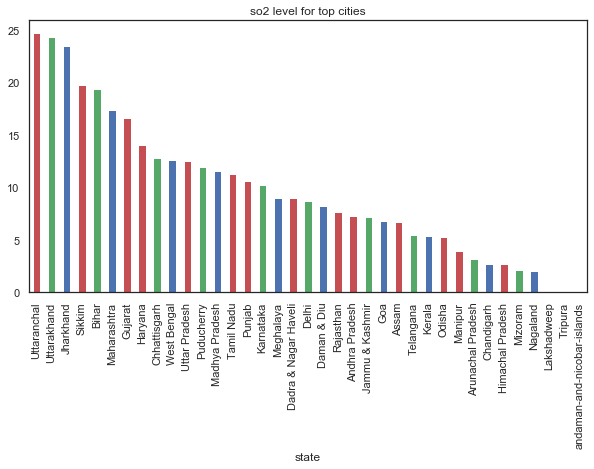

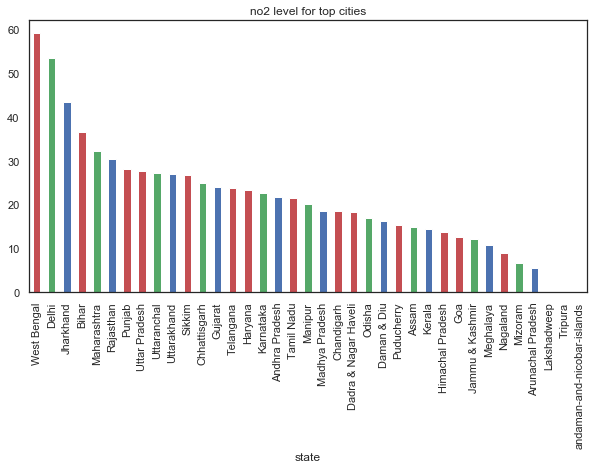

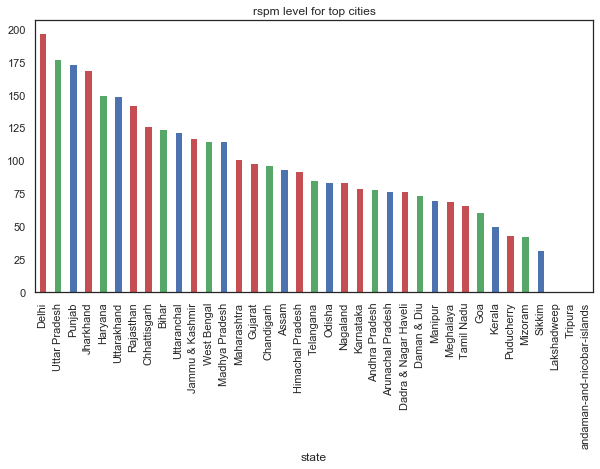

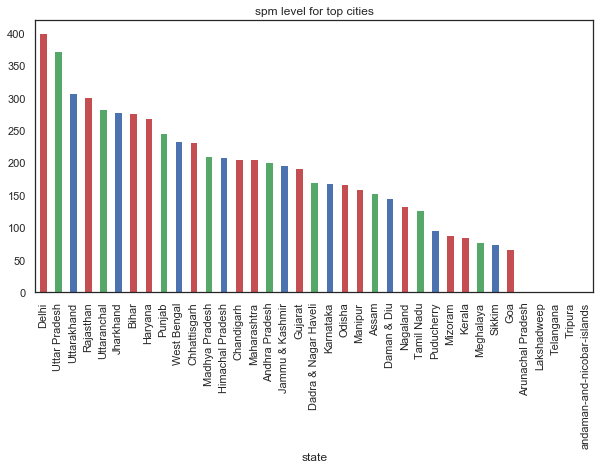

In [193]:
for col in pollutant_values:
    air_pollition_data.groupby('state').mean().sort_values(col, ascending=False)[col].plot(kind='bar', 
                                                            title=f"{col} level for top cities",color=['r', 'g', 'b', 'r', 'g', 'b', 'r'])
    plt.show()

In [80]:
air_pollition_data.isnull().sum()/air_pollition_data.shape[0]*100

sampling_date                   0.000688
state                           0.000000
location                        0.000688
type                            1.237659
so2                             7.951035
no2                             3.725370
rspm                            9.230692
spm                            54.478797
location_monitoring_station     6.309009
date                            0.001606
dtype: float64

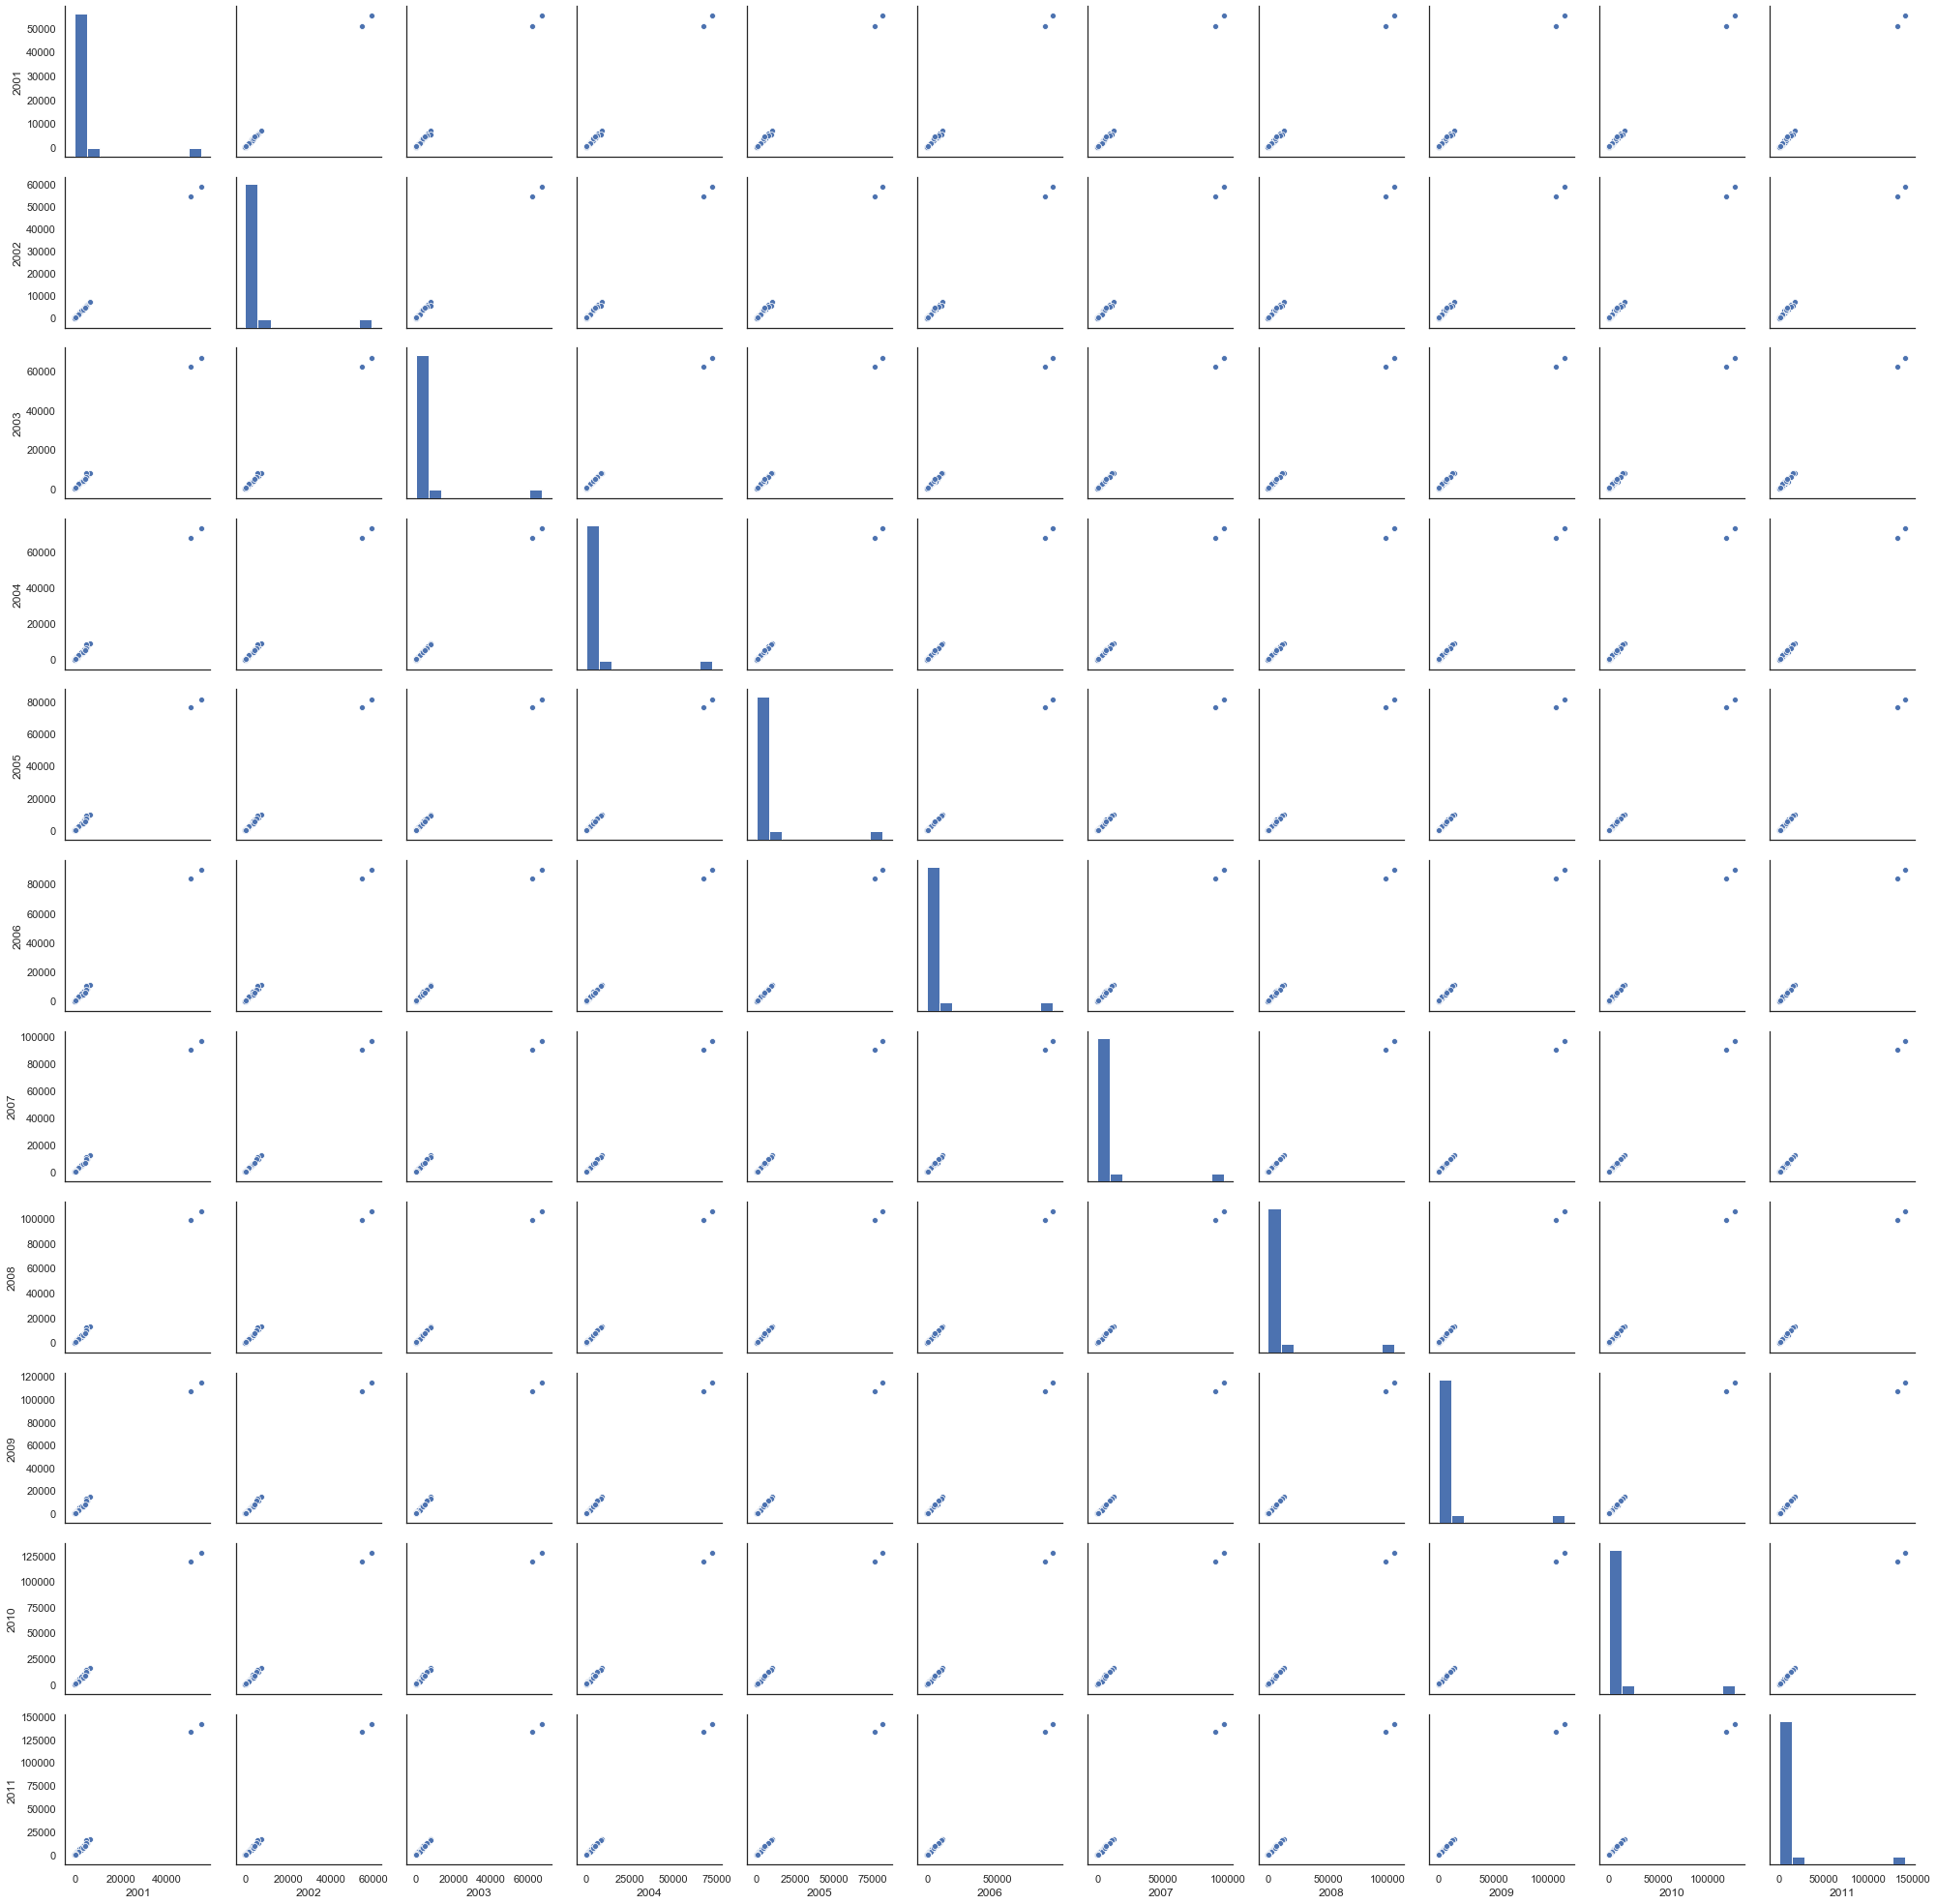

In [62]:
air_pollition_data.

In [124]:
population_data = pd.read_csv("data/population_data.csv")

In [125]:
population_data.head()

,Sl.No.,States,Total Population (In lakh),ST Population (In lakh),% STs in State to total population of State,% STs in the State to total ST population in India
0,1,Chhattisgarh,255.45,78.23,30.6,7.5
1,2,Jharkhand,329.88,86.45,26.2,8.3
2,3,Odisha,419.74,95.91,22.8,9.2
3,4,Madhya Pradesh,726.27,153.17,21.1,14.7
4,5,Gujarat,604.40,89.17,14.8,8.5


In [126]:
second_population_data = pd.read_csv("data/city_town_type_population.csv")

In [133]:
air_pollition_data['location'].str.lower()

0         hyderabad
1         hyderabad
2         hyderabad
3         hyderabad
4         hyderabad
            ...    
435737     uluberia
435738     uluberia
435739          NaN
435740          NaN
435741          NaN
Name: location, Length: 435742, dtype: object

In [136]:
air_pollition_data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [137]:
columns_to_drop = ['stn_code', 'agency','pm2_5']

In [139]:
air_pollition_data = air_pollition_data.drop(columns_to_drop, axis=1)

In [141]:
second_population_data.columns

Index(['S.No', 'Name of City', 'State', 'Type', 'Population (2011)',
       'Population class', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [144]:
merge_df = air_pollition_data.merge(second_population_data[['Name of City', 'Population (2011)']], left_on='location', right_on='Name of City', how='left')

In [148]:
merge_df['location'].isnull().sum()

6

In [153]:
merge_df['location'].unique()

array(['Hyderabad', 'Vishakhapatnam', 'Visakhapatnam', 'Tirupati',
       'Vijayawada', 'Patancheru', 'Ramagundam', 'Kurnool', 'Guntur',
       'Nalgonda', 'Nellore', 'Warangal', 'Chittoor', 'Khammam',
       'Kakinada', 'Ananthapur', 'Eluru', 'Kadapa', 'Karimnagar',
       'Nizamabad', 'Ongole', 'Rajahmundry', 'Sangareddy', 'Srikakulam',
       'Vizianagaram', 'Itanagar', 'Naharlagun', 'Guwahati', 'Bongaigaon',
       'Dibrugarh', 'Golaghat', 'Hailakandi', 'Sibsagar', 'Tezpur',
       'Silchar', 'Daranga', 'Lakhimpur', 'Nagaon', 'Nalbari',
       'Sivasagar', 'Silcher', 'Tinsukia', 'Margherita', 'Sindri',
       'Jharia', 'Dhanbad', 'Jamshedpur', 'Patna', 'Chandigarh', 'Korba',
       'Bhilai Nagar', 'Raipur', 'Bhilai', 'Bilaspur', 'Daman',
       'Silvassa', 'Khadoli', 'Daman Diu & Nagar', 'Delhi', 'Ponda',
       'Vasco', 'Panjim', 'Panaji', 'Mormugao', 'Amona', 'Assanora',
       'Bicholim', 'Codli', 'Curchorem', 'Honda', 'Usgao', 'Kundaim',
       'Mapusa', 'Margao', 'Sanguem', 'T

In [157]:
import numpy as np

In [169]:
merge_df['Name of City'].unique().tolist().apply(lambda x : str(x))

AttributeError: 'list' object has no attribute 'apply'

In [150]:

merge_df[merge_df['Population (2011)'].isnull()]

,sampling_date,state,location,type,so2,no2,rspm,spm,location_monitoring_station,date,Name of City,Population (2011)
68,January - M011992,Andhra Pradesh,Vishakhapatnam,NaN,52.6,89.6,NaN,679.0,NaN,1/1/1992,NaN,NaN
69,January - M011992,Andhra Pradesh,Vishakhapatnam,NaN,55.8,33.8,NaN,245.0,NaN,1/1/1992,NaN,NaN
70,January - M011992,Andhra Pradesh,Vishakhapatnam,NaN,33.4,31.7,NaN,320.0,NaN,1/1/1992,NaN,NaN
71,January - M011992,Andhra Pradesh,Vishakhapatnam,NaN,43.6,30.8,NaN,334.0,NaN,1/1/1992,NaN,NaN
78,February - M021992,Andhra Pradesh,Vishakhapatnam,NaN,32.9,144.8,NaN,555.0,NaN,2/1/1992,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
443702,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443703,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443704,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443705,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
second_population_data['Name of City']

Mansa              2
Narsinghgarh       2
Vapi               2
Lalganj            2
Ramnagar           2
                  ..
Rajgarh (Alwar)    1
Kashipur           1
Pachore            1
Tharangambadi      1
Mahe               1
Name: Name of City, Length: 1196, dtype: int64

In [20]:
urban_population_india = pd.read_csv("data/datafile.csv")

In [23]:
urban_population_india['NameError']

Index(['Year ', 'Percent of Urban population to total population'], dtype='object')

In [34]:
vehicle_data = pd.read_csv("data/city_vehicle_data.csv")

In [35]:
vehicle_data.head()

,Type,Category,Type of Vehicles,Agra (31.3.2016),Ahmedabad (31.3.2016),Allahabad (31.3.2016),Alappuzha (31.3.2016),Aurangabad (31.3.2016),Bengaluru (31.3.2016),Bhopal (31.3.2016),...,Note of Bengaluru (31.3.2016),Note of Chandigarh (31.3.2016),Note of Delhi (31.3.2015),Note of Greater Mumbai (31.3.2016),Note of Kolkata (31.3.2016),Note of Nagpur (31.3.2016),Note of Nashik (31.3.2016),Note of Rajkot (31.3.2016),Note of Surat (31.3.2016),Note of Vadodara (31.3.2016)
0,Transport,I. Multiaxled/Articulated vehicles,I. Multiaxled/Articulated vehicles,120,3412.0,7042,668.0,0,39041.0,3651,...,NaN,NaN,NaN,NaN,*,NaN,NaN,NaN,NaN,NaN
1,Transport,II. Trucks & Lorries,II. Trucks & Lorries,4224,39222.0,8421,2733.0,5300,59086.0,7456,...,NaN,NaN,NaN,NaN,*,*,*,NaN,NaN,NaN
2,Transport,III. Light Motor Vehicles (Goods),a) Four wheelers,5902,38142.0,12764,4969.0,10093,70970.0,14532,...,NaN,NaN,NaN,NaN,*,NaN,NaN,NaN,NaN,NaN
3,Transport,III. Light Motor Vehicles (Goods),b) Three wheelers,12052,60358.0,4655,2232.0,12158,42352.0,8828,...,NaN,NaN,NaN,NaN,*,NaN,NaN,NaN,NaN,NaN
4,Transport,III. Total (Light Motor Vehicles (Goods)),III. Total (Light Motor Vehicles (Goods)),17954,98500.0,17419,7201.0,22251,113322.0,23360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
state_vehicle_data = pd.read_csv("data/state_moter_registration.csv")

In [37]:
state_vehicle_data.head()

,State/Union Territory,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Andhra Pradesh,3966,4389,5002,5720,6458,7218,6367,7208,8059,8923,10189
1,Arunachal Pradesh,21,21,21,21,22,22,22,22,22,22,145
2,Assam,542,596,657,727,815,914,1021,1116,1235,1384,1582
3,Bihar,949,1024,1121,751,1352,1432,1577,1739,1960,2357,2673
4,Chhatisgarh,857,948,1076,1216,1375,1541,1734,1935,2115,2436,2766


In [50]:
state_vehicle_data['2001']

0      3966
1        21
2       542
3       949
4       857
5       341
6      5576
7      1949
8       217
9       330
10      909
11     3537
12     2112
13     3095
14     6760
15       77
16       62
17       31
18      160
19     1096
20     2910
21     2943
22       12
23     5162
24       50
25      364
26     4921
27     1690
28    50639
29       25
30      386
31       13
32       37
33     3635
34        4
35      252
36     4352
37    54991
Name: 2001, dtype: int64

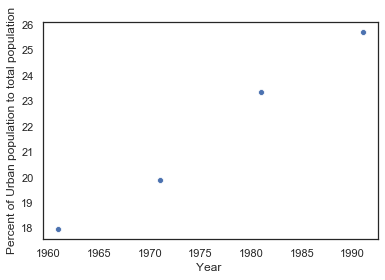

In [29]:
sns.scatterplot(data=urban_population_india, x='Year ', y='Percent of Urban population to total population')

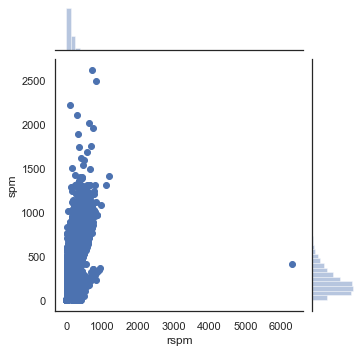

In [6]:
sns.jointplot(x = "rspm", y='spm', data=df, size=5)

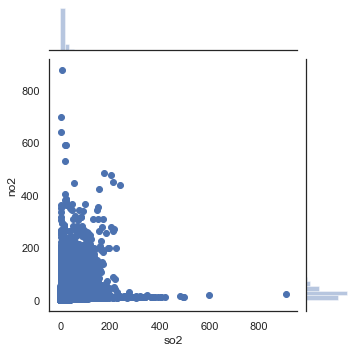

In [4]:
sns.jointplot(x = "so2", y='no2', data=df, size=5)

In [10]:

df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [11]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)


In [12]:

df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()


Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [13]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

In [14]:

#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']


In [15]:
#dataset after deleting the above columns
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [16]:

# 298 locations, 34 states

#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()


Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

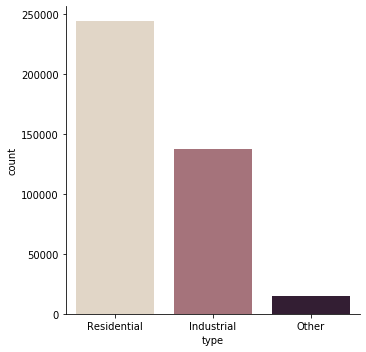

In [17]:
######################################### do add threshold lines
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

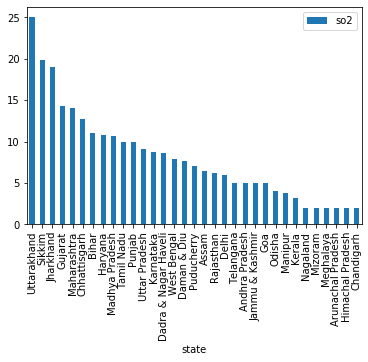

In [18]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

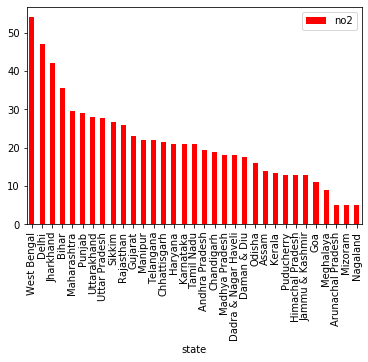

In [19]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

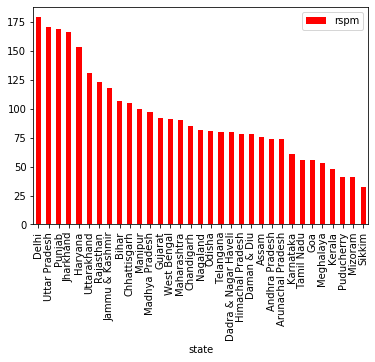

In [20]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')

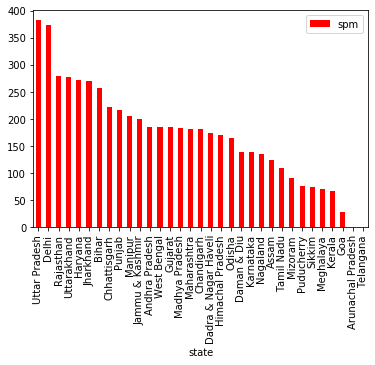

In [21]:
# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

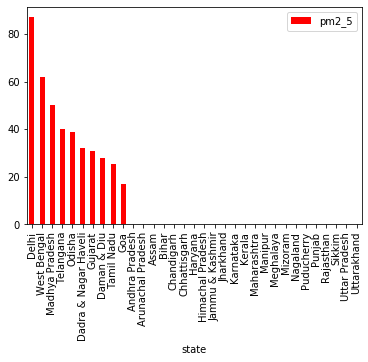

In [22]:
# pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

/home/rohan/.conda/envs/air_pollution_analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/rohan/.conda/envs/air_pollution_analysis/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rohan/.conda/envs/air_pollution_analysis/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


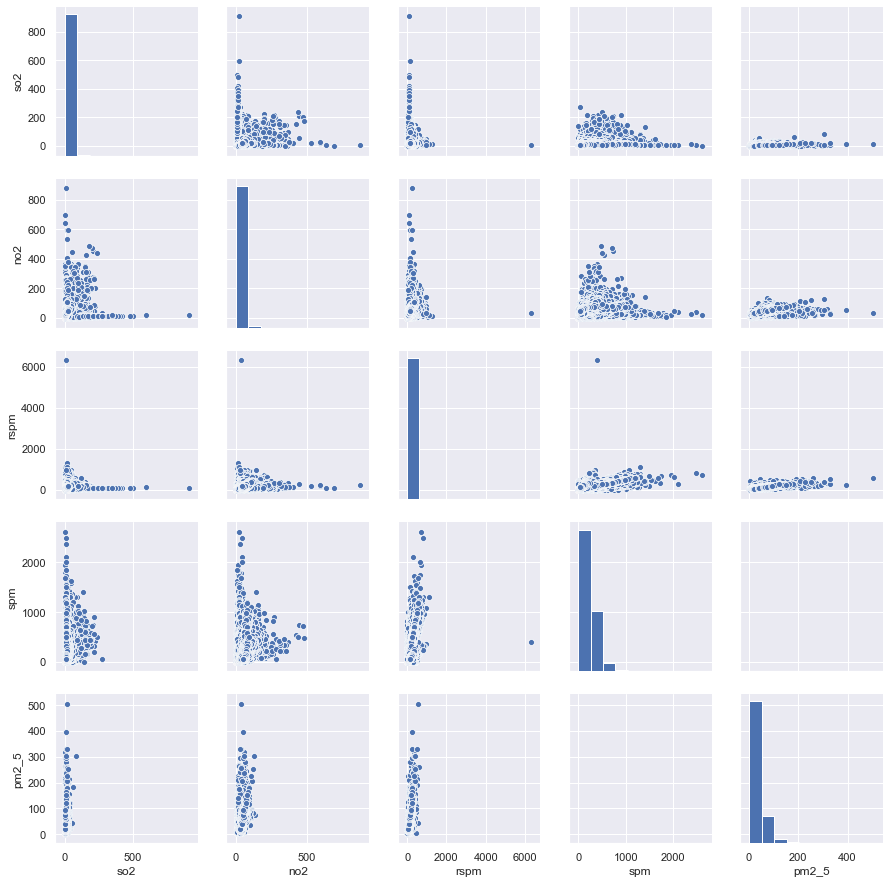

In [23]:

#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

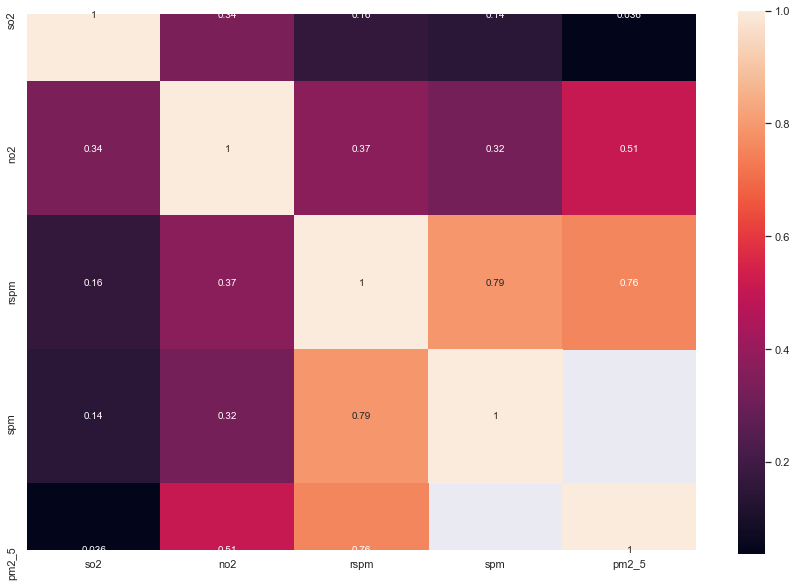

In [26]:
#Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [27]:

# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


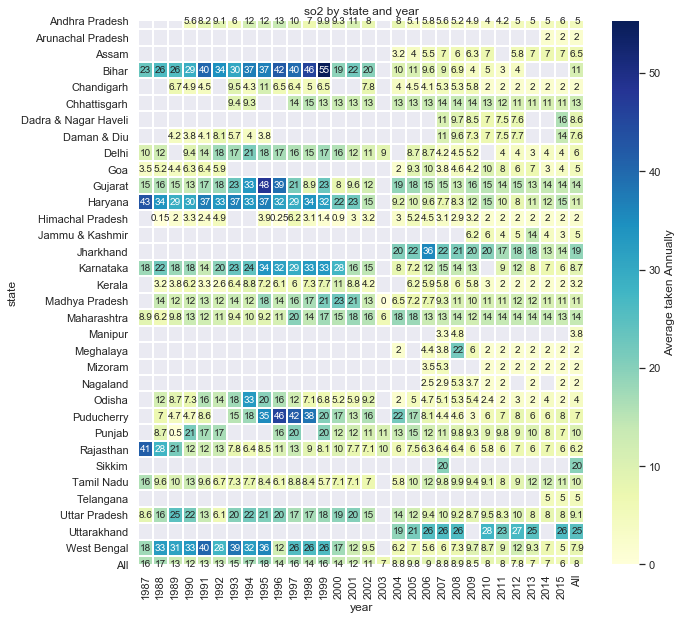

In [28]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

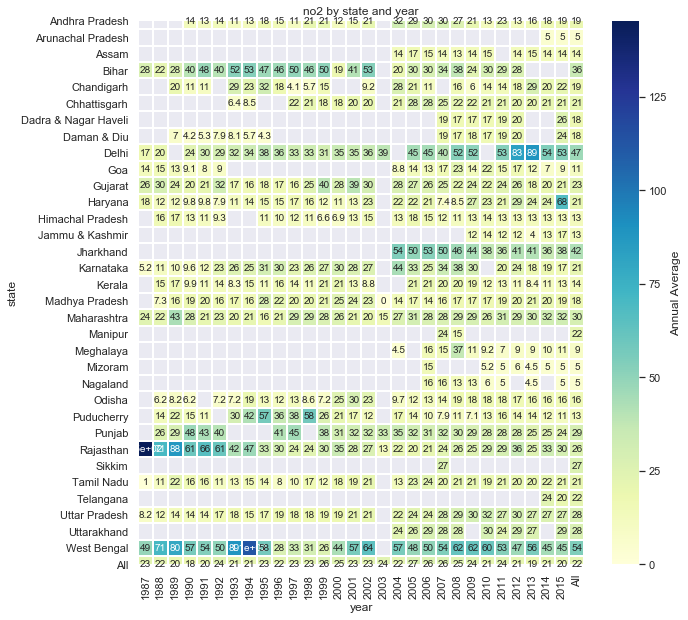

In [29]:
    
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

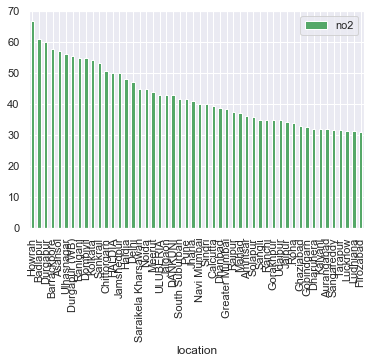

In [30]:
# bar plot of no2 vs location - desc order - first 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

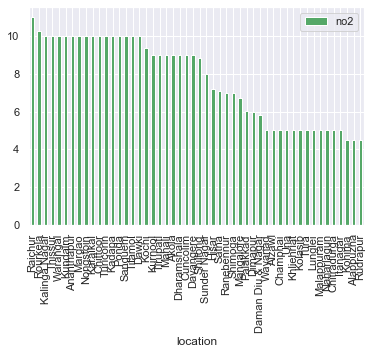

In [31]:
# bar plot of no2 vs location - desc order - last 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

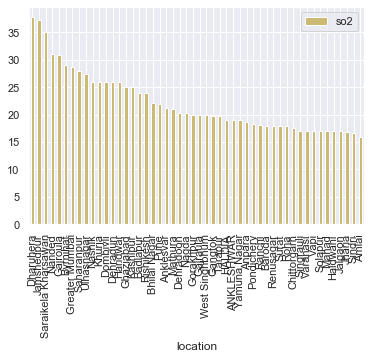

In [32]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

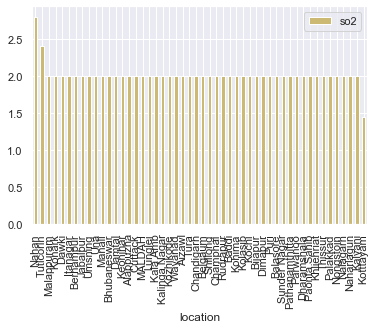

In [33]:
# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')

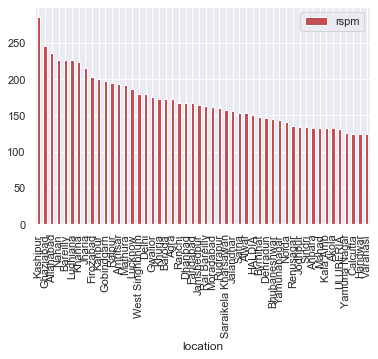

In [34]:
# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

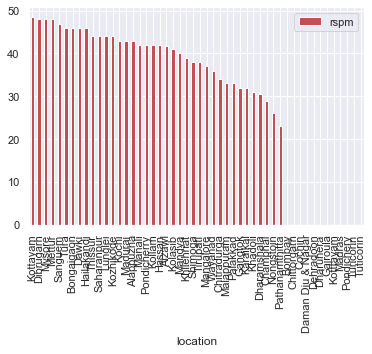

In [35]:
# rspm = PM10 - location wise - last 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')

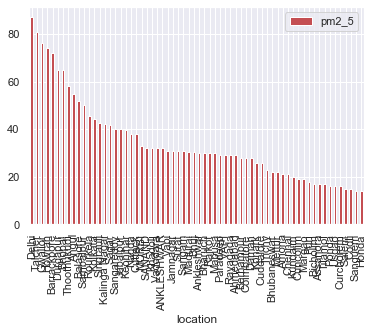

In [36]:

# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

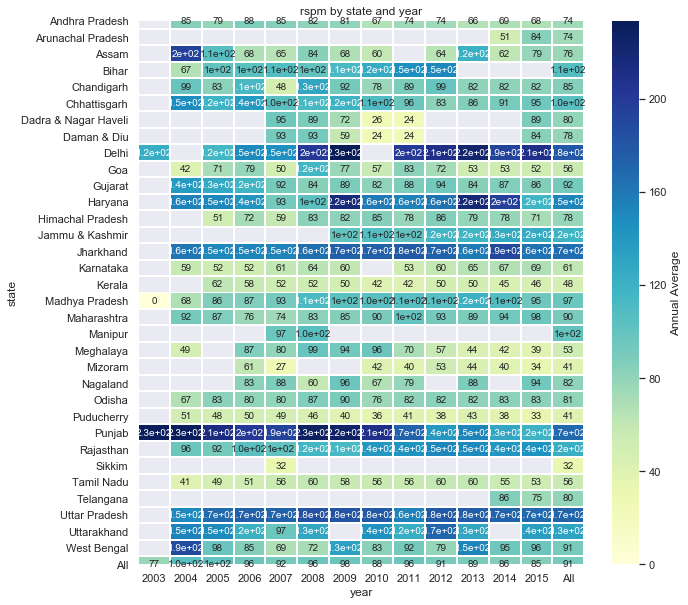

In [37]:

# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

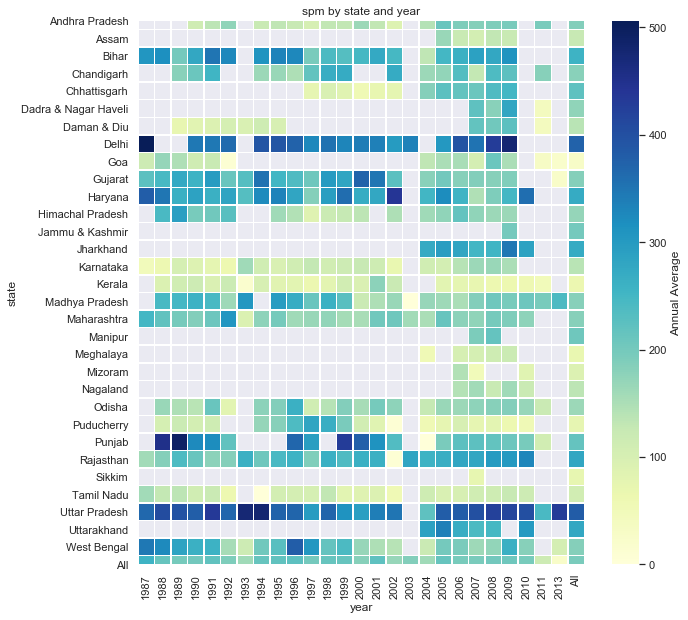

In [39]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})